Descarga de datos: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors


### Librerías y versión de TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
print(tf.__version__)

2.18.0


In [93]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Ruta de logs (usa fecha para evitar sobrescribir)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1,  write_graph=True,  # 🔍 Necesario para la pestaña "Graph"
    write_images=True)


In [7]:
# Ruta donde están almacenadas las imágenes
ruta = "./datosPPT/"

### Cargar Imágenes de *Piedras*, *Papeles*, y *Tijeras*
Se asume que las imágenes están agrupadas por clase y que se encuentran en carpetas diferentes: *rock*, *paper*,  *scissors*. Además, cada carpeta tiene imágenes cuyo nombre va de 0.png a 699.png indicando el número de imagen.

In [8]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split




# Definición de clases e identificadores
descripcion = ("paper", "rock", "scissors")
clases = {"paper": 0, "rock": 1, "scissors": 2}

# Arreglos para almacenar imágenes y etiquetas
imagenes_entrena_list = []
clases_entrena_list = []
imagenes_prueba_list = []
clases_prueba_list = []

# Procesamos cada clase
for clase, idx in clases.items():
    path_clase = os.path.join(ruta, clase)
    print(path_clase)
    # Listar los archivos que terminen en .png (ajusta la extensión si es necesario)
    archivos = [f for f in os.listdir(path_clase) if f.lower().endswith('.png')]
    
    # Puedes ordenar o mezclar la lista según lo requieras; aquí la dejamos como viene
    # Dividir la lista de archivos en 70% entrenamiento y 30% prueba
    train_files, test_files = train_test_split(archivos, train_size=0.7, random_state=42)
    
    # Cargar imágenes de entrenamiento
    for file in train_files:
        ruta_img = os.path.join(path_clase, file)
        imagen = Image.open(ruta_img)
        imagenes_entrena_list.append(np.array(imagen))
        clases_entrena_list.append(idx)
    
    # Cargar imágenes de prueba
    for file in test_files:
        ruta_img = os.path.join(path_clase, file)
        imagen = Image.open(ruta_img)
        imagenes_prueba_list.append(np.array(imagen))
        clases_prueba_list.append(idx)

# Convertir las listas a arreglos NumPy
imagenes_entrena = np.array(imagenes_entrena_list)
clases_entrena = np.array(clases_entrena_list)
imagenes_prueba = np.array(imagenes_prueba_list)
clases_prueba = np.array(clases_prueba_list)

# Imprimir formas para verificar
print("Forma de imágenes de entrenamiento:", imagenes_entrena.shape)
print("Forma de imágenes de prueba:", imagenes_prueba.shape)


./datosPPT/paper
./datosPPT/rock
./datosPPT/scissors
Forma de imágenes de entrenamiento: (1531, 200, 300, 3)
Forma de imágenes de prueba: (657, 200, 300, 3)


# Visualización de algunas imágenes

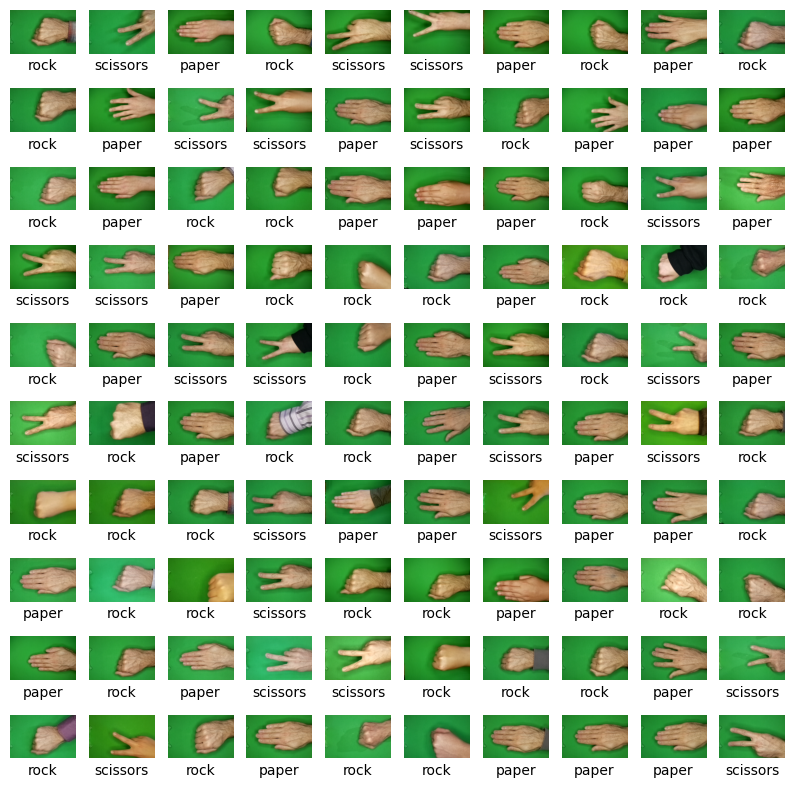

In [9]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Selección aleatoria de una imagen
    indice = random.randint(0, num_entrena*len(clases) - 1)
    plt.imshow(imagenes_entrena[indice], cmap="gray")
    plt.xlabel(descripcion[clases_entrena[indice]])
    plt.grid(False)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Visualización de una imagen arbitraria en tamaño grande

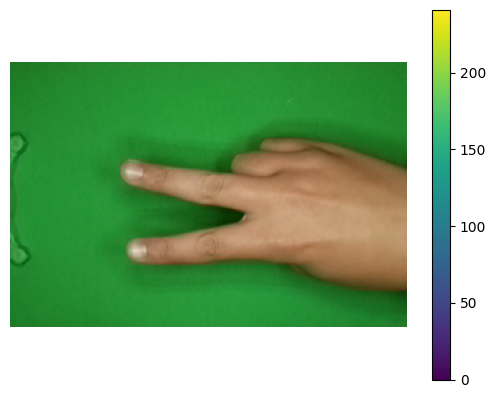

In [10]:
plt.figure()
plt.imshow(imagenes_prueba[502])
plt.colorbar()
plt.grid(False)
plt.box(False)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]

In [11]:
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

# Creación del modelo de la Red Neuronal Convolucional (CNN)

In [12]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Cofigurar el Modelo para Entrenamiento

In [94]:
modelo.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),            
              metrics=["accuracy"])

TypeError: Trainer.compile() got an unexpected keyword argument 'callbacks'

# Entrena el Modelo (es decir, la Red Neuronal Convolucional)

In [96]:
modelo.fit(imagenes_entrena, clases_entrena, epochs=10, 
             callbacks = [tensorboard_callback])

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 35s 695ms/step - accuracy: 0.8940 - loss: 0.3028
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 33s 684ms/step - accuracy: 0.9097 - loss: 0.2420
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 652ms/step - accuracy: 0.9458 - loss: 0.1795
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 33s 687ms/step - accuracy: 0.9505 - loss: 0.1678
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 38s 789ms/step - accuracy: 0.9576 - loss: 0.1340
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 666ms/step - accuracy: 0.9568 - loss: 0.1265
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 657ms/step - accuracy: 0.9580 - loss: 0.1298
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 574ms/step - accuracy: 0.9609 - loss: 0.1175
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 33s 683ms/step - accuracy: 0.9654 - loss: 0.0969
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 37s 774ms/step - accuracy: 0.9740 - loss: 0.1028


# Evalúa el modelo (porcentaje de aciertos con datos de prueba)

In [97]:
perdida, exactitud = modelo.evaluate(imagenes_prueba, clases_prueba)
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba):", exactitud)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.8817 - loss: 0.4785
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba): 0.8280060887336731


# Clasifica las Imágenes de Prueba con la Red Convolucional

In [98]:
predicciones = modelo.predict(imagenes_prueba)

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/flatten_1/Reshape defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\yporq\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\yporq\AppData\Local\Temp\ipykernel_46528\2106631764.py", line 1, in <module>

  File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 562, in predict

  File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 259, in one_step_on_data_distributed

  File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 249, in one_step_on_data

  File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in predict_step

  File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python311\Lib\site-packages\keras\src\layers\layer.py", line 908, in __call__

  File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python311\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Python311\Lib\site-packages\keras\src\models\sequential.py", line 213, in call

  File "c:\Python311\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "c:\Python311\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "c:\Python311\Lib\site-packages\keras\src\models\functional.py", line 637, in call

  File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python311\Lib\site-packages\keras\src\layers\layer.py", line 908, in __call__

  File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python311\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py", line 54, in call

  File "c:\Python311\Lib\site-packages\keras\src\ops\numpy.py", line 4868, in reshape

  File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1915, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_1/flatten_1/Reshape}}]] [Op:__inference_one_step_on_data_distributed_35123]

# Salida de la Red Neuronal para cada Imagen de Prueba

In [ ]:
# Creación de arreglo para almacenar predicciones
clase_predicha = np.empty(num_prueba * len(clases), dtype = "uint8")

for instancia in range(num_prueba * len(clases)):
  # almacena clase predicha para una imagen dada
  clase_predicha[instancia] = np.argmax(predicciones[instancia])
  if clase_predicha[instancia] == clases_prueba[instancia]:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ACERTÓ")
  else:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ERRÓ")

Probabilidades: [0.9910149  0.00751871 0.00146645] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9927998e-01 5.6833308e-04 1.5158569e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.9906183  0.00441287 0.00496886] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9832493e-01 1.2926370e-03 3.8238984e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9809492e-01 1.5732680e-03 3.3174208e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9781322e-01 1.4427457e-03 7.4406760e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.98189390e-01 1.71069987e-03 1.00002915e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9722421e-01 1.9786139e-03 7.9723436e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.7538996  0.19108017 0.05502013] Clase predic

# Matriz de Confusión: Resultado de Evaluación a Detalle

In [ ]:
# papel : 0     piedra : 1     tijera : 2
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)
print("Matriz de Confusión:\n", matriz.numpy())

Matriz de Confusión:
 [[186  11  13]
 [  7 197   6]
 [  4   3 203]]


In [ ]:
imagen_test = "./datosPPT/prueba_tijera.jpeg"

img = Image.open(imagen_test)
img = img.resize((200,300))
img_array = np.array(img)
img_array = img_array.astype("float32") / 255.0
#Agregar una dimensión extra para el batch (porque el modelo espera un batch de imágenes)
img_array = np.expand_dims(img_array, axis=0)


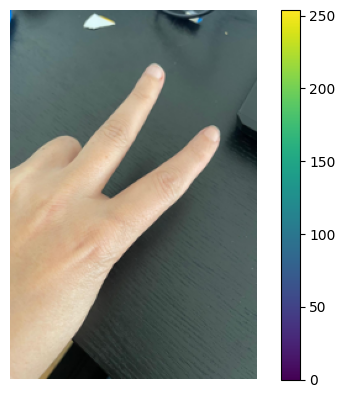

In [ ]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.box(False)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
predicciones = modelo.predict(img_array)
print("Predicciones:", predicciones)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicciones: [[0.12970085 0.00154687 0.8687523 ]]


In [ ]:
np.argmax(predicciones, axis=1)[0]

2

In [ ]:
descripcion[np.argmax(predicciones, axis=1)[0]]

'scissors'

In [ ]:
imagen_test = "./datosPPT/papel_test.png"

img = Image.open(imagen_test)
img = img.resize((200,300))
img_array = np.array(img)
img_array = img_array.astype("float32") / 255.0
#Agregar una dimensión extra para el batch (porque el modelo espera un batch de imágenes)
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
predicciones = modelo.predict(img_array)
print("Predicciones:", predicciones)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicciones: [[7.0108939e-03 2.3885623e-04 9.9275029e-01]]


In [ ]:
np.argmax(predicciones, axis=1)[0]

2

In [ ]:
descripcion[np.argmax(predicciones, axis=1)[0]]

'scissors'